<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Data-Mining/blob/main/Data%20Mining%20Assignment%202/Binary_classification_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 14.9 MB/s 
     |████████████████████████████████| 2.0 MB 75.9 MB/s 
     |████████████████████████████████| 56 kB 5.9 MB/s 
     |████████████████████████████████| 268 kB 67.9 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 3.3 MB 64.9 MB/s 
     |████████████████████████████████| 88 kB 7.4 MB/s 
     |████████████████████████████████| 636 kB 89.1 MB/s 
     |████████████████████████████████| 167 kB 78.8 MB/s 
     |████████████████████████████████| 10.4 MB 62.1 MB/s 
     |████████████████████████████████| 134 kB 84.5 MB/s 
     |████████████████████████████████| 6.8 MB 71.7 MB/s 
     |████████████████████████████████| 1.7 MB 58.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
from pycaret.datasets import get_data
import pandas as pd

In [3]:
file = 'https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/cardio_train.csv'
#file = '/content/drive/MyDrive/DataMining_Datasets/citrus.csv'
data = pd.read_csv(file,  sep=';')
data.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import jinja2

In [6]:
data.shape

(39988, 13)

In [7]:
data_set = data.sample(frac = 0.90, random_state=786)
data_unseen = data.drop(data_set.index)

#data.reset_index(inplace=True, drop=True)
#data_unseen.reset_index(inplace = True, drop = True)

print("data for modelling "+str(data_set.shape))
print("unseen data for predictions "+str(data_unseen.shape))

data for modelling (35989, 13)
unseen data for predictions (3999, 13)


In [8]:
from pycaret.classification import *

In [9]:
binary_cluster = setup(data = data_set, target = 'cardio', session_id=2,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, 
                  multicollinearity_threshold = 0.95,
                  use_gpu=True,
                  log_experiment = True, experiment_name = 'cardio_')

Description            Value
0                               session_id                2
1                                   Target           cardio
2                              Target Type           Binary
3                            Label Encoded             None
4                            Original Data      (35989, 13)
5                           Missing Values            False
6                         Numeric Features                6
7                     Categorical Features                6
8                         Ordinal Features            False
9                High Cardinality Features            False
10                 High Cardinality Method             None
11                   Transformed Train Set      (25192, 16)
12                    Transformed Test Set      (10797, 16)
13                      Shuffle Train-Test             True
14                     Stratify Train-Test            False
15                          Fold Generator  StratifiedKFold
16                             Fold Number               10
17                                CPU Jobs               -1
18                                 Use GPU             True
19                          Log Experiment             True
20                         Experiment Name          cardio_
21                                     USI             25fe
22                         Imputation Type           simple
23          Iterative Imputation Iteration             None
24                         Numeric Imputer             mean
25      Iterative Imputation Numeric Model             None
26                     Categorical Imputer         constant
27  Iterative Imputation Categorical Model             None
28           Unknown Categoricals Handling   least_frequent
29                               Normalize             True
30                        Normalize Method           zscore
31                          Transformation             True
32                   Transformation Method      yeo-johnson
33                                     PCA            False
34                              PCA Method             None
35                          PCA Components             None
36                     Ignore Low Variance             True
37                     Combine Rare Levels            False
38                    Rare Level Threshold             None
39                         Numeric Binning            False
40                         Remove Outliers            False
41                      Outliers Threshold             None
42                Remove Multicollinearity             True
43             Multicollinearity Threshold             0.95
44             Remove Perfect Collinearity             True
45                              Clustering            False
46                    Clustering Iteration             None
47                     Polynomial Features            False
48                       Polynomial Degree             None
49                    Trignometry Features            False
50                    Polynomial Threshold             None
51                          Group Features            False
52                       Feature Selection            False
53                Feature Selection Method          classic
54            Features Selection Threshold             None
55                     Feature Interaction            False
56                           Feature Ratio            False
57                   Interaction Threshold             None
58                           Fix Imbalance            False
59                    Fix Imbalance Method            SMOTE

INFO:logs:Logging experiment in MLFlow
2022/09/09 02:02:49 INFO mlflow.tracking.fluent: Experiment with name 'cardio_' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='cardio',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                num

In [10]:
top3 = compare_models(n_select = 3)

Model  Accuracy     AUC  Recall   Prec.  \
catboost              CatBoost Classifier    0.7360  0.8014  0.6915  0.7573   
gbc          Gradient Boosting Classifier    0.7359  0.8024  0.6874  0.7596   
lightgbm  Light Gradient Boosting Machine    0.7348  0.8008  0.6891  0.7568   
ada                  Ada Boost Classifier    0.7303  0.7948  0.6557  0.7689   
lr                    Logistic Regression    0.7296  0.7896  0.6854  0.7503   
rf               Random Forest Classifier    0.7256  0.7865  0.6973  0.7375   
svm                   SVM - Linear Kernel    0.7218  0.0000  0.6477  0.7627   
ridge                    Ridge Classifier    0.7183  0.0000  0.6821  0.7338   
lda          Linear Discriminant Analysis    0.7183  0.7825  0.6821  0.7338   
et                 Extra Trees Classifier    0.7140  0.7758  0.6933  0.7215   
knn                K Neighbors Classifier    0.6891  0.7387  0.6694  0.6952   
nb                            Naive Bayes    0.6387  0.7429  0.4868  0.6964   
dt               Decision Tree Classifier    0.6378  0.6378  0.6387  0.6358   
qda       Quadratic Discriminant Analysis    0.5266  0.5250  0.2236  0.5420   
dummy                    Dummy Classifier    0.5021  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
catboost  0.7228  0.4718  0.4736     5.365  
gbc       0.7216  0.4716  0.4738     3.349  
lightgbm  0.7213  0.4694  0.4714     0.258  
ada       0.7077  0.4603  0.4654     1.069  
lr        0.7163  0.4591  0.4609     0.127  
rf        0.7168  0.4511  0.4519     3.998  
svm       0.6976  0.4433  0.4510     0.131  
ridge     0.7069  0.4365  0.4377     0.037  
lda       0.7069  0.4365  0.4377     0.126  
et        0.7071  0.4280  0.4283     4.719  
knn       0.6819  0.3781  0.3785     1.359  
nb        0.5729  0.2764  0.2899     0.026  
dt        0.6372  0.2756  0.2757     0.199  
qda       0.2640  0.0507  0.0706     0.043  
dummy     0.0000  0.0000  0.0000     0.017

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:[<catboost.core.CatBoostClassifier object at 0x7feffa058790>, GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_r

In [11]:
type(top3)
print(top3)

[<catboost.core.CatBoostClassifier object at 0x7feffa058790>, GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
           

In [12]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7298  0.7935  0.6948  0.7453  0.7192  0.4594  0.4604
1       0.7179  0.7794  0.6932  0.7274  0.7099  0.4356  0.4361
2       0.7400  0.8057  0.6869  0.7669  0.7247  0.4798  0.4824
3       0.7197  0.7795  0.6882  0.7326  0.7097  0.4393  0.4401
4       0.7320  0.7808  0.6850  0.7542  0.7179  0.4638  0.4658
5       0.7269  0.8012  0.6555  0.7625  0.7050  0.4534  0.4579
6       0.7142  0.7721  0.6643  0.7359  0.6982  0.4281  0.4301
7       0.7332  0.7970  0.6938  0.7513  0.7214  0.4663  0.4676
8       0.7451  0.7963  0.6978  0.7689  0.7316  0.4901  0.4922
9       0.7376  0.7905  0.6946  0.7581  0.7249  0.4750  0.4766
Mean    0.7296  0.7896  0.6854  0.7503  0.7163  0.4591  0.4609
Std     0.0096  0.0105  0.0134  0.0138  0.0098  0.0191  0.0194

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [13]:
dt = create_model('dt', fold = 5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6434  0.6434  0.6413  0.6421  0.6417  0.2867  0.2867
1       0.6346  0.6347  0.6473  0.6295  0.6382  0.2694  0.2695
2       0.6380  0.6379  0.6329  0.6375  0.6352  0.2759  0.2759
3       0.6358  0.6358  0.6372  0.6334  0.6353  0.2715  0.2715
4       0.6326  0.6326  0.6348  0.6300  0.6324  0.2652  0.2652
Mean    0.6369  0.6369  0.6387  0.6345  0.6365  0.2737  0.2738
Std     0.0037  0.0037  0.0051  0.0048  0.0032  0.0074  0.0073

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [14]:
rf = create_model('rf', round = 2)

Accuracy   AUC  Recall  Prec.    F1  Kappa   MCC
Fold                                                  
0         0.73  0.79    0.72   0.74  0.73   0.46  0.46
1         0.72  0.78    0.69   0.72  0.71   0.43  0.43
2         0.73  0.79    0.70   0.75  0.72   0.46  0.47
3         0.72  0.77    0.69   0.73  0.71   0.44  0.44
4         0.73  0.78    0.70   0.74  0.72   0.46  0.46
5         0.73  0.80    0.68   0.75  0.71   0.45  0.45
6         0.72  0.78    0.69   0.72  0.71   0.43  0.43
7         0.73  0.79    0.71   0.74  0.72   0.46  0.46
8         0.74  0.80    0.70   0.76  0.73   0.48  0.48
9         0.72  0.78    0.69   0.73  0.71   0.44  0.44
Mean      0.73  0.79    0.70   0.74  0.72   0.45  0.45
Std       0.01  0.01    0.01   0.01  0.01   0.01  0.02

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [16]:
plot_model(rf, plot = 'parameter')

Parameters
bootstrap                      True
ccp_alpha                       0.0
class_weight                   None
criterion                      gini
max_depth                      None
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease           0.0
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                 2
min_weight_fraction_leaf        0.0
n_estimators                    100
n_jobs                           -1
oob_score                     False
random_state                      2
verbose                           0
warm_start                    False

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
bagged_dt = ensemble_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7008  0.7604  0.6550  0.7192  0.6856  0.4014  0.4030
1       0.6905  0.7461  0.6414  0.7093  0.6736  0.3807  0.3824
2       0.6963  0.7521  0.6406  0.7191  0.6776  0.3924  0.3947
3       0.7035  0.7559  0.6427  0.7294  0.6833  0.4066  0.4095
4       0.6896  0.7488  0.6300  0.7130  0.6689  0.3788  0.3814
5       0.6947  0.7583  0.6356  0.7187  0.6746  0.3891  0.3917
6       0.6856  0.7345  0.6268  0.7081  0.6650  0.3709  0.3733
7       0.7058  0.7640  0.6451  0.7321  0.6859  0.4114  0.4143
8       0.7046  0.7605  0.6459  0.7297  0.6853  0.4090  0.4117
9       0.7035  0.7558  0.6467  0.7274  0.6847  0.4066  0.4091
Mean    0.6975  0.7536  0.6410  0.7206  0.6784  0.3947  0.3971
Std     0.0068  0.0083  0.0079  0.0083  0.0073  0.0136  0.0138

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 6
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [18]:
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=2,
   

In [19]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6226  0.6227  0.6359  0.6176  0.6266  0.2453  0.2454
1       0.6270  0.6270  0.6207  0.6267  0.6237  0.2539  0.2539
2       0.6225  0.6225  0.6311  0.6188  0.6249  0.2450  0.2450
3       0.6336  0.6336  0.6340  0.6315  0.6327  0.2672  0.2672
4       0.6391  0.6391  0.6364  0.6379  0.6371  0.2783  0.2783
5       0.6487  0.6486  0.6427  0.6484  0.6456  0.2973  0.2973
6       0.6300  0.6300  0.6324  0.6274  0.6299  0.2600  0.2600
7       0.6507  0.6506  0.6404  0.6518  0.6460  0.3012  0.3013
8       0.6447  0.6447  0.6356  0.6453  0.6404  0.2893  0.2894
9       0.6534  0.6535  0.6611  0.6492  0.6551  0.3069  0.3070
Mean    0.6372  0.6372  0.6370  0.6355  0.6362  0.2744  0.2745
Std     0.0111  0.0111  0.0098  0.0122  0.0099  0.0222  0.0222

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 7
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fracti

In [20]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7187  0.7814  0.7004  0.7252  0.7126  0.4372  0.4375
1       0.7115  0.7622  0.6869  0.7207  0.7034  0.4229  0.4234
2       0.7201  0.7869  0.6869  0.7342  0.7098  0.4401  0.4410
3       0.7042  0.7657  0.6786  0.7133  0.6955  0.4084  0.4088
4       0.7118  0.7721  0.6770  0.7256  0.7005  0.4234  0.4243
5       0.7134  0.7844  0.6770  0.7281  0.7017  0.4266  0.4276
6       0.7042  0.7610  0.6699  0.7173  0.6928  0.4083  0.4092
7       0.7273  0.7869  0.6946  0.7413  0.7172  0.4544  0.4553
8       0.7265  0.7842  0.6882  0.7433  0.7147  0.4528  0.4540
9       0.7094  0.7724  0.6770  0.7219  0.6988  0.4186  0.4195
Mean    0.7147  0.7757  0.6836  0.7271  0.7047  0.4293  0.4301
Std     0.0078  0.0098  0.0089  0.0093  0.0080  0.0156  0.0157

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 8
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [21]:
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr2 = create_model('lr', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Creating Dashboard logs
INFO:logs:Model: Light Gradient Boosting Machine
INFO:logs:logged params: {'boosting_type': 'gbdt', 'class_weight': 

In [22]:
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr2], method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6746  0.7642  0.6908  0.6674  0.6789  0.3493  0.3495
1       0.6698  0.7574  0.6821  0.6641  0.6730  0.3397  0.3399
2       0.6792  0.7726  0.6924  0.6731  0.6826  0.3585  0.3587
3       0.6773  0.7606  0.6970  0.6687  0.6825  0.3546  0.3549
4       0.6765  0.7621  0.6970  0.6677  0.6820  0.3530  0.3534
5       0.6908  0.7833  0.6930  0.6880  0.6905  0.3815  0.3815
6       0.6733  0.7541  0.6834  0.6680  0.6756  0.3466  0.3467
7       0.6939  0.7812  0.7002  0.6897  0.6949  0.3879  0.3879
8       0.6987  0.7761  0.6978  0.6972  0.6975  0.3974  0.3974
9       0.6975  0.7765  0.7177  0.6881  0.7026  0.3951  0.3955
Mean    0.6832  0.7688  0.6951  0.6772  0.6860  0.3664  0.3665
Std     0.0103  0.0098  0.0094  0.0115  0.0093  0.0206  0.0206

INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 12
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=2, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='

In [23]:
blend_hard = blend_models(estimator_list = [lightgbm, dt, lr2], method = 'hard')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       0.7333  0.0  0.6940  0.7515  0.7216  0.4665  0.4679
1       0.7218  0.0  0.6908  0.7347  0.7121  0.4435  0.4443
2       0.7420  0.0  0.6932  0.7665  0.7280  0.4837  0.4860
3       0.7166  0.0  0.6930  0.7254  0.7088  0.4330  0.4334
4       0.7455  0.0  0.6962  0.7705  0.7315  0.4908  0.4931
5       0.7368  0.0  0.6691  0.7718  0.7168  0.4733  0.4775
6       0.7162  0.0  0.6715  0.7354  0.7020  0.4321  0.4337
7       0.7384  0.0  0.6946  0.7594  0.7255  0.4766  0.4783
8       0.7475  0.0  0.7033  0.7696  0.7350  0.4948  0.4967
9       0.7324  0.0  0.6954  0.7491  0.7213  0.4647  0.4659
Mean    0.7331  0.0  0.6901  0.7534  0.7203  0.4659  0.4677
Std     0.0108  0.0  0.0104  0.0161  0.0099  0.0216  0.0222

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 13
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=2, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='

In [24]:
blender_top3 = blend_models(top3)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7357  0.8060  0.6940  0.7554  0.7234  0.4713  0.4728
1       0.7242  0.7914  0.6908  0.7385  0.7139  0.4483  0.4492
2       0.7507  0.8189  0.6964  0.7797  0.7357  0.5012  0.5041
3       0.7217  0.7917  0.6754  0.7423  0.7073  0.4432  0.4450
4       0.7428  0.7993  0.6898  0.7696  0.7275  0.4853  0.4879
5       0.7368  0.8132  0.6675  0.7729  0.7163  0.4733  0.4777
6       0.7269  0.7885  0.6826  0.7469  0.7133  0.4535  0.4552
7       0.7420  0.8123  0.6914  0.7673  0.7273  0.4837  0.4861
8       0.7495  0.8095  0.7026  0.7735  0.7363  0.4988  0.5009
9       0.7352  0.8026  0.6914  0.7559  0.7222  0.4702  0.4719
Mean    0.7365  0.8033  0.6882  0.7602  0.7223  0.4729  0.4751
Std     0.0095  0.0099  0.0098  0.0136  0.0092  0.0190  0.0194

INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 14
INFO:logs:VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7feff1313bd0>),
                             ('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                

In [25]:
print(blender_top3.estimators_)

[<catboost.core.CatBoostClassifier object at 0x7ff035c38610>, GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
           

In [26]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 14.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.3.0 requires matplotlib<3.6,>=3.2, but you have matplotlib 3.1.3 which is incompatible.
autoviz 0.1.55 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


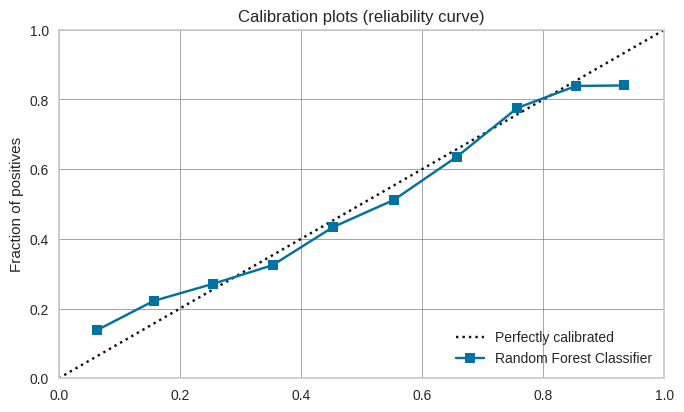

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
plot_model(rf, plot='calibration')

In [28]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7298  0.7935  0.6948  0.7453  0.7192  0.4594  0.4604
1       0.7179  0.7794  0.6932  0.7274  0.7099  0.4356  0.4361
2       0.7400  0.8057  0.6869  0.7669  0.7247  0.4798  0.4824
3       0.7197  0.7795  0.6882  0.7326  0.7097  0.4393  0.4401
4       0.7320  0.7808  0.6850  0.7542  0.7179  0.4638  0.4658
5       0.7269  0.8012  0.6555  0.7625  0.7050  0.4534  0.4579
6       0.7142  0.7721  0.6643  0.7359  0.6982  0.4281  0.4301
7       0.7332  0.7970  0.6938  0.7513  0.7214  0.4663  0.4676
8       0.7451  0.7963  0.6978  0.7689  0.7316  0.4901  0.4922
9       0.7376  0.7905  0.6946  0.7581  0.7249  0.4750  0.4766
Mean    0.7296  0.7896  0.6854  0.7503  0.7163  0.4591  0.4609
Std     0.0096  0.0105  0.0134  0.0138  0.0098  0.0191  0.0194

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 15
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


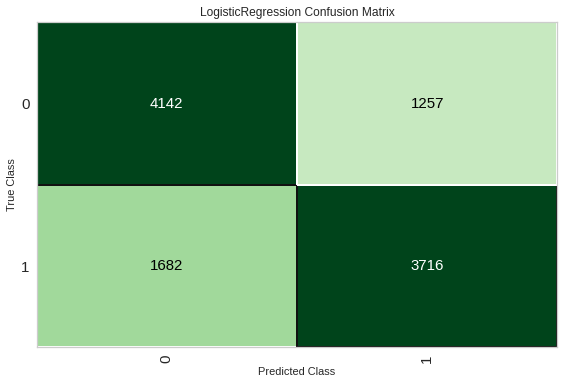

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(lr, plot = 'confusion_matrix')

In [30]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7298  0.7935  0.6988  0.7432  0.7203  0.4594  0.4602
1       0.7171  0.7794  0.6964  0.7247  0.7103  0.4340  0.4344
2       0.7432  0.8057  0.6932  0.7686  0.7289  0.4861  0.4885
3       0.7185  0.7795  0.6898  0.7300  0.7093  0.4369  0.4376
4       0.7324  0.7808  0.6866  0.7539  0.7187  0.4646  0.4665
5       0.7277  0.8012  0.6619  0.7601  0.7076  0.4550  0.4588
6       0.7142  0.7721  0.6675  0.7342  0.6992  0.4281  0.4299
7       0.7352  0.7970  0.6986  0.7519  0.7243  0.4703  0.4714
8       0.7463  0.7963  0.7018  0.7686  0.7336  0.4925  0.4943
9       0.7384  0.7905  0.6986  0.7571  0.7267  0.4766  0.4780
Mean    0.7303  0.7896  0.6893  0.7492  0.7179  0.4604  0.4620
Std     0.0105  0.0105  0.0131  0.0148  0.0104  0.0209  0.0212

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 16
INFO:logs:LogisticRegression(C=7.349, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [31]:
print(tuned_lr)

LogisticRegression(C=7.349, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


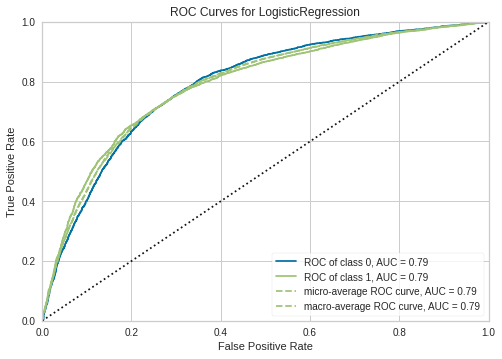

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(tuned_lr, plot = 'auc')

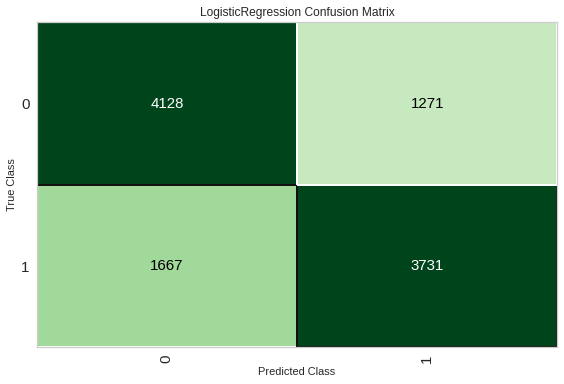

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [33]:
plot_model(tuned_lr, plot = 'confusion_matrix')

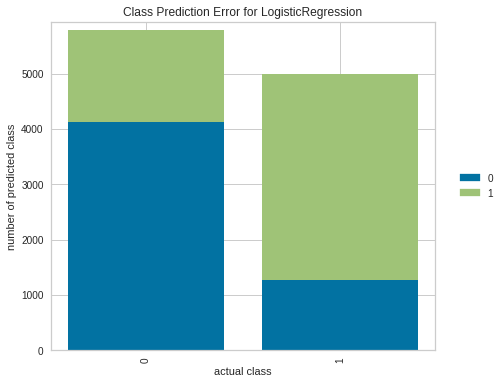

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(tuned_lr, plot='error')

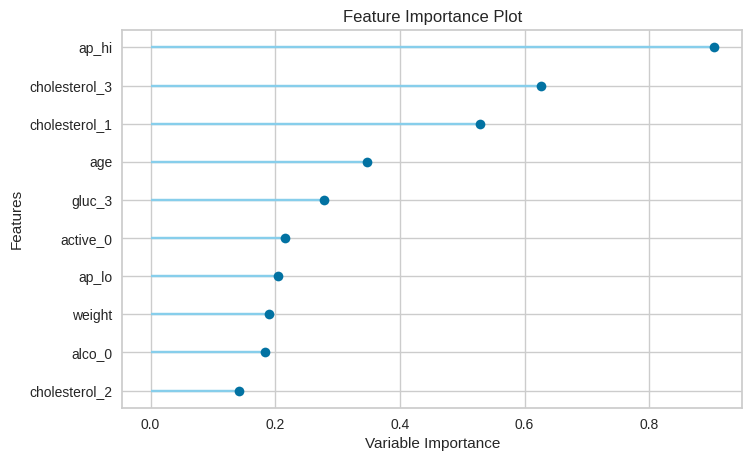

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(tuned_lr, plot='feature')

In [36]:
best = automl(optimize = 'Recall')
best

INFO:logs:Initializing automl()
INFO:logs:automl(optimize=Recall, use_holdout=False, return_train_score=False)
INFO:logs:Model Selection Basis : CV Results on Training set
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs=None, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_thres

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [37]:
pred_body_perf = predict_model(tuned_lr, data = data_unseen)
pred_body_perf.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=7.349, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression    0.7239  0.7829  0.6774  0.7518  0.7126  0.4484   

      MCC  
0  0.4506

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
5    8  21914       1     151    67.0    120     80            2     2      0   
12  18  14791       2     165    60.0    120     80            1     1      0   
14  23  14532       2     181    95.0    130     90            1     1      1   
51  66  18338       1     169    84.0    150    100            1     1      0   
54  69  19679       1     152    79.0    130     90            1     1      0   

    alco  active  cardio  Label   Score  
5      0       0       0      1  0.6182  
12     0       0       0      0  0.7477  
14     1       1       0      0  0.6429  
51     0       1       1      1  0.7364  
54     0       1       1      1  0.5736

In [38]:
save_model(tuned_lr,'Binary classification model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=7.349, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Binary classification model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='cardio',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
         

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='cardio',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                        target_variable='cardio',
                                        threshold=0.95)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=7.349, clas

In [39]:
new_prediction = predict_model(tuned_lr, data = data_unseen)
new_prediction.head()
new_prediction.tail()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=7.349, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression    0.7239  0.7829  0.6774  0.7518  0.7126  0.4484   

      MCC  
0  0.4506

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
39936  57086  14607       2     172    69.0    120     80            1     1   
39964  57135  19711       1     160    59.0    110     70            2     1   
39966  57137  21745       1     165    62.0    110     70            2     1   
39968  57140  23434       1     171    78.0    120     80            1     1   
39985  57162  22696       2     174    81.0    140     80            1     1   

       smoke  alco  active  cardio  Label   Score  
39936      0     0       0       0      0  0.7144  
39964      0     0       1       0      0  0.7130  
39966      0     0       1       1      0  0.6353  
39968      0     0       1       0      1  0.5678  
39985      0     0       1       1      1  0.7319

In [40]:
from pycaret.utils import check_metric
check_metric(new_prediction['cardio'], new_prediction['Label'], metric = 'Accuracy')

0.7239